<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

# **Análisis de datos**
---


## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

<table><thead>
  <tr>
    <th>#</th>
    <th>Integrante</th>
    <th>Documento de identidad</th>
  </tr></thead>
<tbody>
  <tr>
    <td>1</td>
    <td>Laura Alejandra Díaz López</td>
    <td>1010018062</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Diego Alejandro Feliciano Ramos</td>
    <td>1024586904</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Geraldine Gracia Ruiz</td>
    <td>1032488268</td>
  </tr>
</tbody>
</table>

In [1]:
# Instalamos los paquetes necesarios para el notebook en caso de trabajar desde Google Colab
!pip install wget pandas ydata-profiling ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import wget, pandas as pd

# Descargar el dataset transformado de la entrega anterior del repositorio publico
url = 'https://github.com/MLDS-UN-ProjectTeam/final-term-project/raw/main/resources/data/Saber_11_2023-2_-_Preprocesado.csv?download='
downloaded_file_name = 'Saber_11_2023-2_-_Preprocesado.csv'
wget.download(url = url, out = downloaded_file_name)

# Cargar en el notebook el conjunto de datos con las restricciones conocidas:
# - Delimitador: ¬
# - Quoting = 3 => Sin comillas para todas las variables
saber11_dataframe = pd.read_csv(downloaded_file_name, delimiter='¬', quoting=3)

/var/folders/18/_z1lzmt167s25frbpysj7rqw0000gn/T/ipykernel_7535/1646976130.py:11: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  saber11_dataframe = pd.read_csv(downloaded_file_name, delimiter='¬', quoting=3)


In [3]:
# Importamos matplotlib y scipy para las visualizaciones.
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm

## **1. Análisis y resultados**
---

Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?
- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?
- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?
- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

In [4]:
# Observamos la información básica del dataframe.
saber11_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37503 entries, 0 to 37502
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  37503 non-null  int64  
 1   Unnamed: 0                    37503 non-null  float64
 2   ESTU_GENERO                   37503 non-null  object 
 3   FAMI_EDUCACIONPADRE           37503 non-null  object 
 4   FAMI_EDUCACIONMADRE           37503 non-null  object 
 5   FAMI_TRABAJOLABORPADRE        37503 non-null  object 
 6   FAMI_TRABAJOLABORMADRE        37503 non-null  object 
 7   ESTU_DEDICACIONLECTURADIARIA  37503 non-null  object 
 8   ESTU_DEDICACIONINTERNET       37503 non-null  object 
 9   ESTU_HORASSEMANATRABAJA       37503 non-null  object 
 10  COLE_NATURALEZA               37503 non-null  object 
 11  COLE_CARACTER                 37503 non-null  object 
 12  COLE_JORNADA                  37503 non-null  object 
 13  P

Se empezó por comprobar que la variable objetivo de estudio, "PUNT_GLOBAL", estuviera normalmente distribuída, puesto que es una pieza de información importante a la hora de evaluar su correlación con otras variables. Esto se hizo a través de un Gráfico Q-Q.

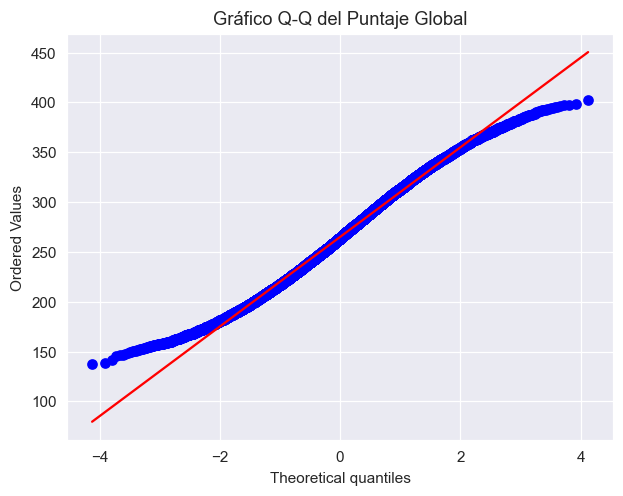

In [5]:
plt.figure(dpi = 110) # Mejoramos la visibilidad de la gráfica.
stats.probplot(saber11_dataframe['PUNT_GLOBAL'], plot= plt)
plt.title('Gráfico Q-Q del Puntaje Global')
plt.show()

<img src = "./resources/images/grafqq_puntglo.png" alt = "Gráfico Q-Q del Puntaje Global" width = "70%"></img>

A partir de la imagen es fácil observar que la mayoría de puntos azules, que representan a los datos, se encuentran sobre la línea roja, de donde se concluye que la variable de estudio SÍ está distribuída normalmente, con un leve comportamiento anormal en los cuantiles más bajo y más alto.

### **1.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?



Previo al análisis de correlaciones se realiza una transformación de los datos para dos variables de interés, el nivel de estudios más alto alcanzado por la madre y el padre de cada estudiante, pues originalmente está representada como variable categórica, lo cual dificulta el análisis de correlación con las demás variables numéricas. Los datos se transformaron de la siguiente manera:

In [6]:
# RANGOS PARA NIVELES DE ESTUDIO
rangos_edu = {
    'Ninguno': 0,
    'No sabe': 0,
    'Primaria incompleta': 0.5,
    'Primaria completa': 1,
    'Secundaria (Bachillerato) incompleta': 1.5,
    'Secundaria (Bachillerato) completa': 2,
    'Técnica o tecnológica incompleta': 2.5,
    'Técnica o tecnológica completa': 3,
    'Educación profesional incompleta': 2.5,
    'Educación profesional completa': 4,
    'Postgrado': 5,
}

In [7]:
saber11_dataframe = saber11_dataframe.loc[saber11_dataframe['FAMI_EDUCACIONPADRE'] != 'No Aplica']
saber11_dataframe['FAMI_EDUCACIONPADRE_NUM'] = saber11_dataframe['FAMI_EDUCACIONPADRE'].map(rangos_edu)

In [8]:
saber11_dataframe = saber11_dataframe.loc[saber11_dataframe['FAMI_EDUCACIONMADRE'] != 'No Aplica']
saber11_dataframe['FAMI_EDUCACIONMADRE_NUM'] = saber11_dataframe['FAMI_EDUCACIONMADRE'].map(rangos_edu)

**Variables a evaluar:**

* FAMI_ESTRATOVIVIENDA_N : Estrato socioeconómico de la vivienda.
* ESTU_INSE_INDIVIDUAL : Índice Socioeconómico del evaluado
* ESTU_NSE_ESTABLECIMIENTO : Nivel Socioeconómico del Establecimiento
* FAMI_EDUCACIONMADRE_NUM: Nivel educativo más alto alcanzado por la madre.
* FAMI_EDUCACIONPADRE_NUM: Nivel educativo más alto alcanzado por el padre.

La selección de estas variables estuvo fundamentada en la limpieza y evaluación hecha en entregas anteriores. Adicionalmente se evaluó qué variables daban información más valiosa de acuerdo al objetivo principal del proyecto: encontrar factores socioeconómicos que afectan de forma relevante y determinante el rendimiento de los estudiantes a la hora de presentar el exámen de estado.

A continuación, presentamos la matriz de correlaciones que refleja las relaciones entre las variables del conjunto de datos, proporcionando una visión de cómo interactúan entre sí y destacando las relaciones entre las variables.

<Axes: >

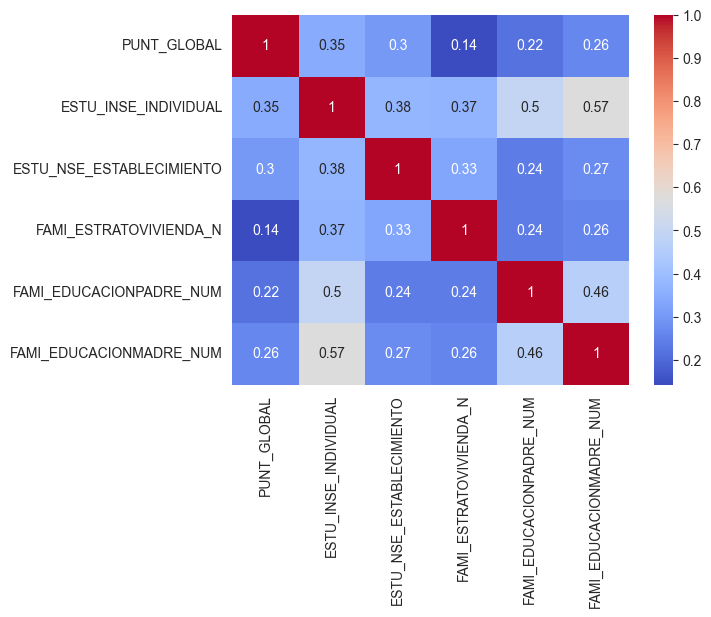

In [9]:
var_drop = ['Unnamed: 0.1', 'Unnamed: 0']

sns.heatmap(saber11_dataframe.corr(numeric_only = True).drop(var_drop).T.drop(var_drop), annot = True, cmap = 'coolwarm', fmt='.2g')

A partir de la matriz de correlación podemos notar que el puntaje de un estudiante en la prueba tiene mayor relación con el índice socioeconómico individual (0.35), seguido del nivel educativo de la madre (0.26) y el nivel educativo del padre (0.22). Esto sugiere que el nivel socioeconómico y la educación de los padres influyen moderadamente en el rendimiento académico.

Dado que las variables nivel educativo de la madre y el nivel educativo del padre tienen un comportamiento similar, se decide elegir la que tiene mayor coeficiente de correlación, en este caso, la variable correspondiente a la madre.

Además de esto, podemos observar que los factores socioeconómicos y educativos de los padres están relacionados entre sí. En este caso, el nivel educativo de la madre y del padre tienen una correlación de 0.46. También es posible ver que el índice socioeconómico del evaluado tiene una correlación relativamente alta con la educación de ambos padres (0.57 y 0.50).

En cuanto a la presencia de redundancia en las variables, se observa que variables como el nivel educativo de los padres y el índice socioeconómico individual están estrechamente relacionadas. Esto sugiere que medir tanto el nivel educativo de los padres como el nivel socioeconómico individual podría ser redundante, ya que ambos factores capturan aspectos similares del contexto familiar que pueden influir en el rendimiento académico de estudiante.

Tras el análisis de correlaciones entre varias variables de relevancia con el puntaje global obtenido por los estudiantes en el examen de estado, se concluyo que las variables más importantes a estudiar y tomar en cuenta son:

- Índice Individual de Nivel Socioeconómico.
- Máximo nivel educativo alcanzado por la madre del estudiante.

### **1.2. Análisis de regresiones**
---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?
- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?


Se eligieron las dos variables acorde a lo obtenido en el análisis de correlaciones, que además dan cuenta de forma amplia de la realidad socioeconómica del estudiante.

Se empezó entonces por analizar el Índice Socioeconómico Indidivudal con una regresión lineal, usando la librería statsmodel para obtener información sobre el intercepto y la pendiente de la recta.

In [10]:
model = sm.OLS.from_formula("PUNT_GLOBAL ~ ESTU_INSE_INDIVIDUAL", data=saber11_dataframe)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     4980.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:05:42   Log-Likelihood:            -1.8857e+05
No. Observations:               36519   AIC:                         3.771e+05
Df Residuals:                   36517   BIC:                         3.772e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              137.6087      1.818     75.672      0.000     134.044     141.173
ESTU_INSE_INDIVIDUAL     2.3932      0.034     70.573      0.000       2.327       2.460
==============================================================================
Omnibus:                      485.472   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.148
Skew:                           0.056   Prob(JB):                     6.66e-66
Kurtosis:                       2.570   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src = "./resources/images/reg_dat_inse.png" alt = "Información de la regresión lineal del puntaje global en el examen de estado en función del índice socioeconómico indivudal" width = "70%"></img>

Los resultados se discutirán en la sección 2.1.2.

Se hizo el mismo procedimiento teniendo en cuenta el nivel máximo de estudios de la madre, así:

In [11]:
model = sm.OLS.from_formula("PUNT_GLOBAL ~ FAMI_EDUCACIONMADRE_NUM", data=saber11_dataframe)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2679.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:05:42   Log-Likelihood:            -1.8961e+05
No. Observations:               36519   AIC:                         3.792e+05
Df Residuals:                   36517   BIC:                         3.792e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 241.9488      0.500    483.855      0.000     240.969     242.929
FAMI_EDUCACIONMADRE_NUM    10.5446      0.204     51.757      0.000      10.145      10.944
==============================================================================
Omnibus:                      613.822   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.956
Skew:                           0.088   Prob(JB):                     1.03e-81
Kurtosis:                       2.537   Cond. No.                         6.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src = "./resources/images/reg_dat_edumadre.png" alt = "Información de la regresión lineal del puntaje global en función del nivel educativo más alto alcanzado por la madre" width = "70%"></img>

Los resultados se discutirán en la sección 2.1.2.

Se consideró la opción de estudiar esta variable categórica transformando sus valores en dummies, así:

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_dummies = pd.get_dummies(saber11_dataframe['FAMI_EDUCACIONMADRE'], drop_first=True)
df_dummies = df_dummies.astype(int)
df_final = pd.concat([df_dummies, saber11_dataframe['PUNT_GLOBAL']], axis=1)

X = df_final.drop('PUNT_GLOBAL', axis=1)
y = df_final['PUNT_GLOBAL'] 

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

ModuleNotFoundError: No module named 'sklearn'

<img src = "./resources/images/reg_dummies.png" alt = "Información de la regresión tras transformar la variable del nivel educativo más alto alcanzado por la madre" width = "70%"></img>

## **2. Resultados y visualizaciones**

### **2.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.

### **2.1.1. Visualizaciones Estáticas: Análisis de correlación**
---

Para el análisis de correlaciones se hizo uso de una función que permite visualizar la relación entre las dos variables.

In [ ]:
# Función para evaluar correlaciones entre variables

def graficar_corr(df, var_a, var_b):

  r = df[var_a].corr(df[var_b]);
  fig, ax = plt.subplots(dpi = 110);
  df.plot.scatter(var_a, var_b, title=f"Coeficiente de correlación: {r :.2}", ax = ax,
                marker='o', linestyle='None', s = 70, alpha = 0.5, grid=True
                );


Se empezó entonces por las dos variables más evidentes, aquellas que da cuenta del estrato socioeconómico del estudiante; la primera, relacionada a su vivienda, la segunda, a su índice individual. Así:

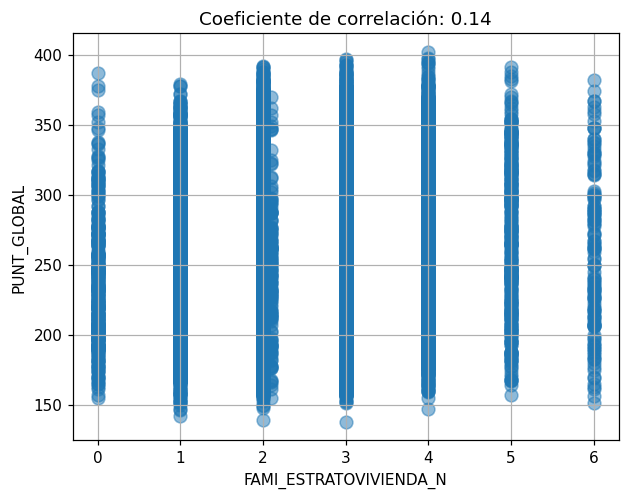

In [ ]:
graficar_corr(saber11_dataframe, 'FAMI_ESTRATOVIVIENDA_N', 'PUNT_GLOBAL')

<img src = "./resources/images/corr_estrato_viv.png" alt = "Correlación entre el Putaje Global y el estrato socioeconómico de la vivienda del evaluado" width = "70%"></img>

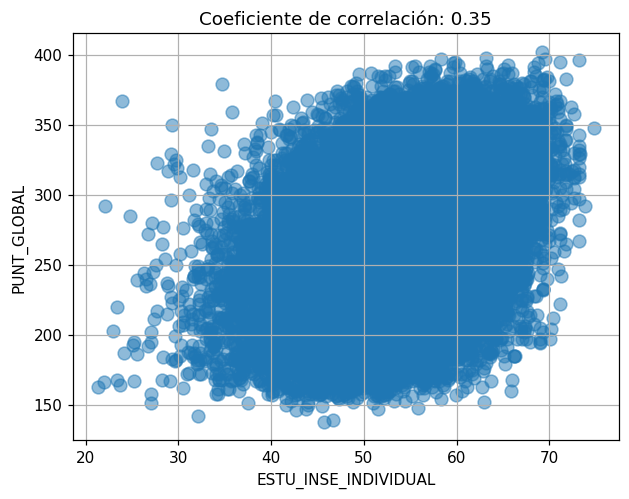

In [ ]:
graficar_corr(saber11_dataframe, 'ESTU_INSE_INDIVIDUAL', 'PUNT_GLOBAL')

<img src = "./resources/images/corr_estu_inse.png" alt = "Correlación entre el Putaje Global y el Índice Socioeconómico del evaluado" width = "70%"></img>

De forma interesante, si bien se alcanzó a apreciar una correlación leve con el estrato socioeconómico de la vivienda del estudiante, fue al tener encuenta su índice individual que se hizo evidente el tipo de relación entre las dos variables. Se obtiene allí un coeficiente de correlación de 0.34 y, al visualizar los datos, se observó un resultado esperado: a mayor índice socioeconómico, mejores resultados en el exámen de estado.

De forma similar se observó el nivel socioeconómico del establecimiento:

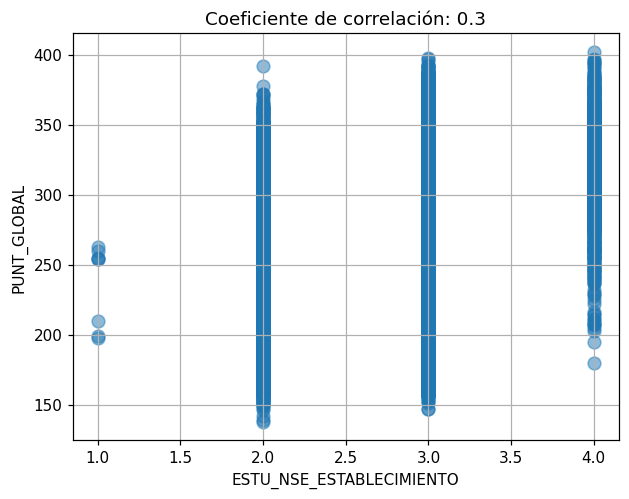

In [ ]:
graficar_corr(saber11_dataframe, 'ESTU_NSE_ESTABLECIMIENTO', 'PUNT_GLOBAL')

<img src = "./resources/images/corr_nse_establecimiento.png" alt = "Correlación entre el Putaje Global y el Nivel Socioeconómico del Establecimiento" width = "70%"></img>

Una vez más se hace obvia la diferencia: a medida que aumenta el nivel socioeconómico, mejoran los resultados del examen. Teniendo en cuenta que los tres resultados dan cuenta de factores similares y se puede incurrir en redundancias, se decidió tomar como parámetro de evaluación principal el Índice Individual Socioeconómico.  

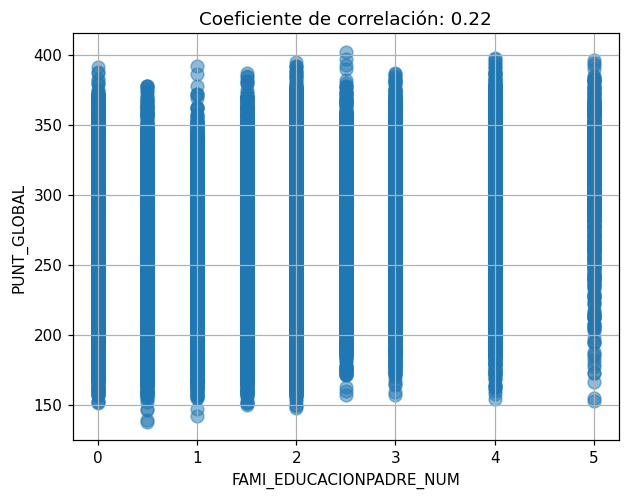

In [ ]:
graficar_corr(saber11_dataframe, 'FAMI_EDUCACIONPADRE_NUM', 'PUNT_GLOBAL')

<img src = "./resources/images/corr_edupadre.png" alt = "Correlación entre el Putaje Global y el nivel educativo más alto alcanzado por el padre" width = "70%"></img>

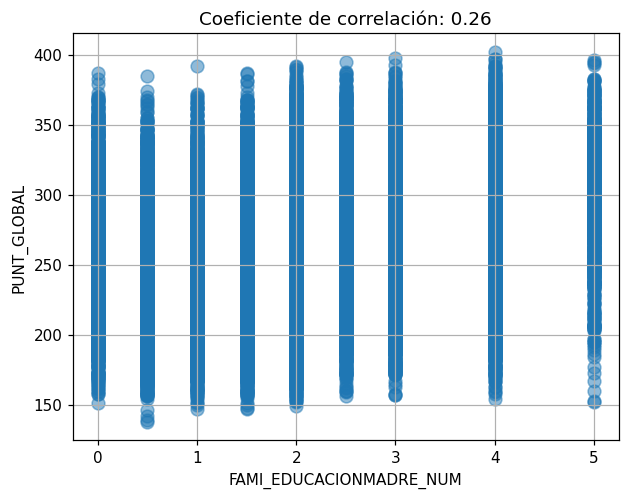

In [ ]:
graficar_corr(saber11_dataframe, 'FAMI_EDUCACIONMADRE_NUM', 'PUNT_GLOBAL')

<img src = "./resources/images/corr_edumadre.png" alt = "Correlación entre el Putaje Global y el nivel educativo más alto alcanzado por el madre" width = "70%"></img>

Se observó aquí una correlación bastante pequeña pero, a pesar de tenue, existente, de donde se concluyó que a mayor nivel de estudios alcanzado por los padres, mejores resultados en el examen de estado. Dado que ambas variables tienen un comportamiento similar, se decidió elegir la que tiene mayor coeficiente de correlación, en este caso, la variable correspondiente a la madre.

### **2.1.2. Visualizaciones Estáticas: Análisis de regresión**
---

A partir de la información obtenida en la sección anterior, se procedió a visualizar el modelo lineal entre el Puntaje Global y el Índice socioeconómico Individual, así:

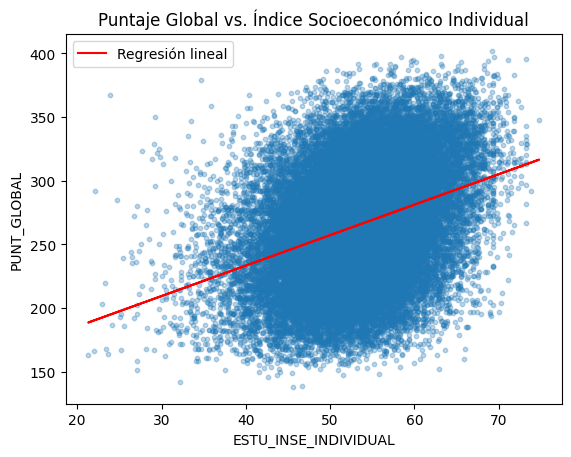

In [ ]:
saber11_dataframe['modelo_INS'] =  2.3932 * saber11_dataframe['ESTU_INSE_INDIVIDUAL'] + 137.6087

ax = saber11_dataframe.plot.scatter('ESTU_INSE_INDIVIDUAL', 'PUNT_GLOBAL', title="Puntaje Global vs. Índice Socioeconómico Individual",
                s = 10, alpha = 0.3, grid=True)
saber11_dataframe.plot.line('ESTU_INSE_INDIVIDUAL', 'modelo_INS',
                   c='r', label='Regresión lineal', ax=ax);

<img src = "./resources/images/reg_graf_inse.png" alt = "Visualización de la regresión lineal del puntaje global en el examen de estado en función del índice socioeconómico indivudal" width = "70%"></img>

A pesar de la alta dispersión de los datos entorno a la recta y aunque el R^2 sea bastante bajo (0.120), la regresión ciertamente sigue el patrón comportamental de lo mismos.
Es importante señalar que esto es muy común en conjuntos de datos en las ciencias sociales y que en estos casos un valor de R^2 mayor a 0.1 es aceptable siempre que la mayoría de sus covariables sean estadísticamente significativas. En este caso, la variable ESTU_INSE_INDIVIDUAL es estadísticamente significativa, pues el p valor obtenido del proceso de regresión es igual a cero (p valor < 0.5).

Así mismo, se realizó la visualización para el par de variables Puntaje Global y Nivel de estudios de la Madre para la visualización, así:

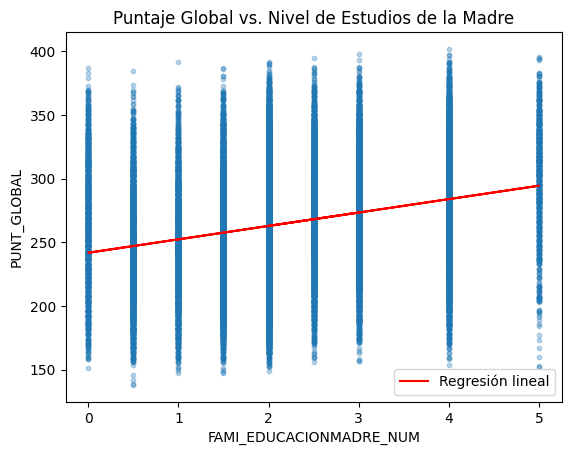

In [ ]:
saber11_dataframe['modelo_EDUMADRE'] =  10.5342 * saber11_dataframe['FAMI_EDUCACIONMADRE_NUM'] + 241.8596

ax = saber11_dataframe.plot.scatter('FAMI_EDUCACIONMADRE_NUM', 'PUNT_GLOBAL', title="Puntaje Global vs. Nivel de Estudios de la Madre",
                s = 10, alpha = 0.3, grid=True)
saber11_dataframe.plot.line('FAMI_EDUCACIONMADRE_NUM', 'modelo_EDUMADRE',
                   c='r', label='Regresión lineal', ax=ax);

<img src = "./resources/images/reg_graf_edumadre.png" alt = "Visualización de la regresión lineal del puntaje global en el examen de estado en función del nivel educativo más alto alcanzado por la madre" width = "70%"></img>

Se obtuvo aquí una pendiente mucho menos marcada a la encontrada para la otra variable, sin embargo, aún da cuenta de cómo a medida que el nivel educativo de la madre crece, también lo hace el puntaje del examen.

Para ambas variables se observó que a causa de la dispersión de los datos, no resulta tan sencillo estimar el valor de una variable a partir del modelo, sin embargo, este funciona muy bien para explicar el comportamiento que tienen las variables una respecto a la otra.

### **2.2. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

Se creó una visualización interactiva usando plotly.express para representar la relación entre el índice socioeconómico de los estudiantes (ESTU_INSE_INDIVIDUAL) y sus puntajes globales en las pruebas Saber 11 (PUNT_GLOBAL), desglosados por el nivel educativo de sus madres (FAMI_EDUCACIONMADRE). El gráfico incluye gráficos de distribución marginales (histogramas) que facilitan la exploración de la distribución de ambas variables.

In [ ]:
fig = px.scatter(saber11_dataframe, x="ESTU_INSE_INDIVIDUAL", y="PUNT_GLOBAL", marginal_x="histogram", marginal_y="histogram", color = 'FAMI_EDUCACIONMADRE')
fig.show()

**Instrucciones para interactuar con la visualización:**
- **Zoom:** Se puede hacer zoom sobre áreas específicas de la gráfica seleccionando con el cursor.
- **Información detallada:** Al pasar el ratón sobre cualquier punto de la gráfica, se mostrará información detallada sobre ese punto, como el puntaje, el índice socioeconómico, y el nivel educativo de la madre.
- **Filtrado por color:** En la leyenda del gráfico (a la derecha), se puede hacer clic en los niveles educativos para ocultar o mostrar los puntos asociados a un nivel educativo específico.
- **Distribuciones:** Los histogramas marginales permiten explorar la distribución de las variables principales en los ejes. Esto es útil para ver cómo los datos están distribuidos a lo largo de la población.

La capacidad de interactuar con los datos, como ocultar categorías o acercar áreas específicas del gráfico, permite identificar patrones o anormalidades que podrían no ser evidentes en gráficos estáticos. En esta visualización se pueden observar:
- **Correlaciones:** Se puede observar cómo el puntaje global tiende a aumentar con el índice socioeconómico, mostrando una correlación positiva entre estas variables.
- **Desigualdad educativa:** Al filtrar los datos por nivel educativo de la madre, es posible observar tendencias en la distribución de puntajes para los estudiantes cuyas madres tienen diferentes niveles educativos.
- **Análisis de distribuciones:** Los histogramas laterales ayudan a identificar sesgos o agrupaciones en las distribuciones tanto del índice socioeconómico como del puntaje global, lo que puede indicar la necesidad de normalización de los datos.

La visualización revela que existe una amplia dispersión en los puntajes globales, con una tendencia a concentrarse entre valores de 200 a 300 puntos. Además, los estudiantes con madres que poseen educación profesional o superior tienden a obtener puntajes más altos. Por otro lado, los estudiantes con madres que tienen un nivel educativo bajo o que no se reporta muestran una mayor dispersión en los puntajes.
Este análisis y las interacciones permiten a los investigadores observar relaciones importantes y segmentar los datos en subgrupos para análisis más profundos. Además, las gráficas interactivas pueden ser útiles para identificar outliers, mejorar la calidad de los datos y generar hipótesis de investigación adicionales.


<img src = "./resources/images/vis_interactiva.png" alt = "Imagen de la visualización" width = "90%"></img>

### **2.3. Visualización de Mapas Coropléticos (Opcional)**
---

* Si aplica mapas coropléticos para representar datos geoespaciales, incluya estas visualizaciones.
* Explique la elección de este tipo de visualización y cómo ésta contribuye a la comprensión de patrones geográficos y a la solución planteada.

In [ ]:
# NO APLICA

### **2.4. Interpretación de Resultados**
---
* ¿Existen patrones o tendencias significativas en los datos?
* ¿Qué significan los resultados en términos prácticos?
* ¿Existen patrones o tendencias inesperadas en los datos que requieran una consideración especial o una investigación adicional?
* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

Recuerde que la interpretación de resultados es una fase clave para extraer el significado de los datos y proporcionar respuestas o soluciones al problema inicial.

Los datos muestran una correlación positiva entre el índice socioeconómico y el puntaje global, así como entre el nivel educativo de la madre y el rendimiento académico. Los estudiantes con madres más educadas tienden a obtener mejores resultados.

Esto evidencia que el contexto socioeconómico y la educación parental influyen en el rendimiento, señalando desigualdades en el acceso a oportunidades educativas.

Sin embargo, la dispersión en los puntajes de estudiantes con madres de alta educación indica que otros factores, como la motivación o el entorno escolar, también pueden jugar un papel importante.

Por lo anterior, uno de los principales hallazgos que puede contribuir al proceso de toma de decisiones es la necesidad de dirigir recursos y apoyo a estudiantes de contextos socioeconómicos bajos, haciendo que el sistema educativo sea más equitativo y eficiente.


## **3. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1. La educación es fundamental para el desarrollo de una sociedad equitativa, llevar a cabo estudios sobre las diferentes variables que entran en juego es importante para identificar desigualdades y guiar políticas que brinden mejores oportunidades educativas, especialmente para estudiantes de familias con menos recursos.
2. Se presentaron problemas con datos faltantes y outliers, pero la variable de interés tenía una distribución normal, lo cual nos permite hacer suposiciones para la regresión. Las variables categóricas necesitaron tratamiento especial para las etapas posteriores.
3. La limpieza y selección de datos fueron esenciales para asegurar un análisis confiable y eliminar inconsistencias que podrían distorsionar los resultados.
4. Se identificó que el nivel socioeconómico y la educación materna influyen en el rendimiento académico, aunque la correlación observada no fue muy alta. Este fenómeno es común en contextos de este tipo, donde las variables pueden interactuar de maneras complejas. Es importante señalar que el enfoque de este estudio no está en predecir resultados, sino en comprender los factores que afectan el rendimiento académico, lo que sugiere la necesidad de implementar políticas que apoyen a estudiantes de entornos desfavorecidos.

## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*